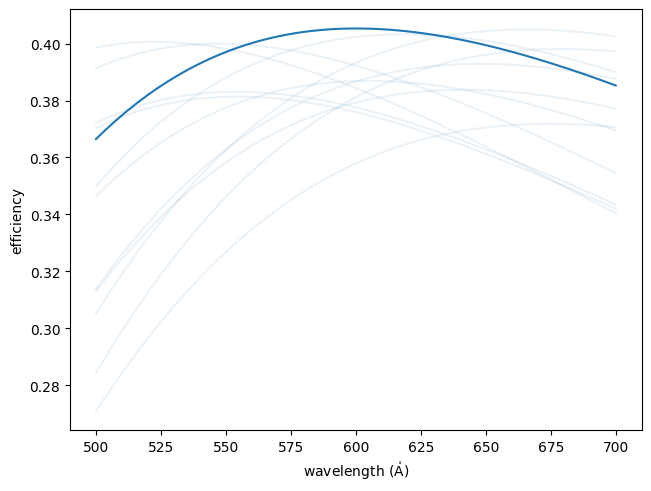

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
import astropy.visualization
import named_arrays as na
import optika
from esis.flights.f1.optics import gratings

# Define an array of wavelengths with which to sample the efficiency
wavelength = na.geomspace(500, 700, axis="wavelength", num=1001) * u.AA

# Define the incidence angle to be the same as the Horiba technical proposal
angle = 1.3 * u.deg

# Define the incident rays from the wavelength array
rays = optika.rays.RayVectorArray(
    wavelength=wavelength,
    position=0 * u.mm,
    direction=na.Cartesian3dVectorArray(
        x=np.sin(angle),
        y=0,
        z=np.cos(angle),
    ),
)

# Initialize the ESIS diffraction grating ruling model
rulings = gratings.rulings.ruling_design()

# Compute the efficiency of the grating rulings
efficiency = rulings.efficiency(
    rays=rays,
    normal=na.Cartesian3dVectorArray(0, 0, -1),
)

# Plot the efficiency vs wavelength
fig, ax = plt.subplots(constrained_layout=True)
na.plt.plot(wavelength, efficiency, ax=ax);
ax.set_xlabel(f"wavelength ({wavelength.unit:latex_inline})");
ax.set_ylabel("efficiency");

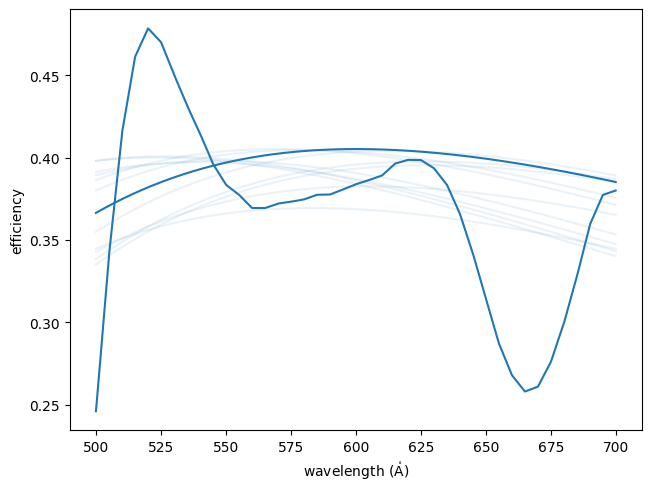

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
import astropy.visualization
import named_arrays as na
import optika
from esis.flights.f1.optics import gratings

# Define an array of wavelengths with which to sample the efficiency
wavelength = na.geomspace(500, 700, axis="wavelength", num=1001) * u.AA

# Define the incidence angle to be the same as the Horiba technical proposal
angle = 1.3 * u.deg

# Define the incident rays from the wavelength array
rays = optika.rays.RayVectorArray(
    wavelength=wavelength,
    position=0 * u.mm,
    direction=na.Cartesian3dVectorArray(
        x=np.sin(angle),
        y=0,
        z=np.cos(angle),
    ),
)

# Define the surface normal
normal = na.Cartesian3dVectorArray(0, 0, -1)

# Initialize the ESIS diffraction grating ruling model
ruling_design = gratings.rulings.ruling_design()
ruling_measurement = gratings.rulings.ruling_measurement()

# Compute the efficiency of the grating rulings
efficiency_design = ruling_design.efficiency(
    rays=rays,
    normal=normal,
)
efficiency_measurement = ruling_measurement.efficiency(
    rays=rays,
    normal=normal,
)

# Plot the efficiency vs wavelength
fig, ax = plt.subplots(constrained_layout=True)
na.plt.plot(wavelength, efficiency_design, ax=ax);
na.plt.plot(wavelength, efficiency_measurement, ax=ax);
ax.set_xlabel(f"wavelength ({wavelength.unit:latex_inline})");
ax.set_ylabel("efficiency");